# Import packages


To download an install $\texttt{cosmocnc}$, see [github.com/inigozubeldia/cosmocnc](https://github.com/inigozubeldia/cosmocnc/tree/main).

To download and install $\texttt{class_sz}$, see [github.com/CLASS-SZ/class_sz](https://github.com/CLASS-SZ/class_sz).

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.environ['PATH_TO_COSMOPOWER_ORGANIZATION'] = '/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization'
import cosmocnc as cosmocnc

PATH_TO_COSMOPOWER_ORGANIZATION is already set to: /Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization


In a terminal you may need to do: 
```bash
export PATH_TO_COSMOPOWER_ORGANIZATION=/path/to/cosmopower-organization
export PYTHONPATH=/path/to/class_sz_organization/classy_szfast:PYTHONPATH
```

In [3]:
cosmocnc.__file__

'/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/cosmocnc/__init__.py'

In [4]:
import classy_sz
from classy_sz import Class
classy_sz.__file__

PATH_TO_CLASS_SZ_DATA not set.
Defaulting to: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is not correctly set. Setting it now...
PATH_TO_CLASS_SZ_DATA is set to /Users/boris/class_sz_data_directory
Required directories already exist. Skipping download.


'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class-sz/python/classy_sz.cpython-39-darwin.so'

In [5]:
path_to_act_dr6_data = '/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/data/act_dr6_benchmark/'

## class_sz binned calculation

In [6]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'Omega_b': 0.049,
'Omega_cdm':  0.261,
'H0': 68.,
'sigma8': 0.81,
'tau_reio':  0.0561,
'n_s': 0.965,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 1e13*0.6766,
'M_max': 1e16*0.6766,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
# 'ndim_redshifts':200, 
'ndim_redshifts' :500,
# 'ndim_masses' : 200,
'n_m_dndlnM' : 500,
'n_z_dndlnM' : 500,

# 'm_pivot_ym_[Msun]': 3e14,  
    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : f'{path_to_act_dr6_data}/nemo_sim_thetas_151024_49bins.txt',
'sz_selection_function_skyfracs_file' : f'{path_to_act_dr6_data}/nemo_sim_skyfracs_151024_49bins.txt',
'sz_selection_function_ylims_file' : f'{path_to_act_dr6_data}/nemo_sim_ylims_151024_49bins.txt',    


'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 2.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,




'dlny' : 0.05,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : -5.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 2.2e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.2,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,

'cosmo_model': 1,
        })
        
M.compute_class_szfast()
# M.compute()


CPU times: user 36.9 s, sys: 2.43 s, total: 39.4 s
Wall time: 6 s


In [7]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

2698.0945002731837

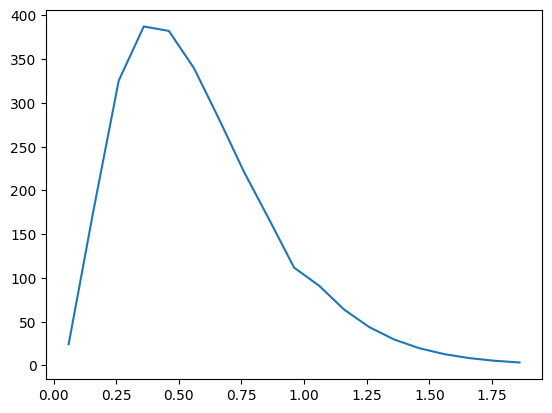

In [8]:
plt.plot(z_center,N_clusters_z_theory)

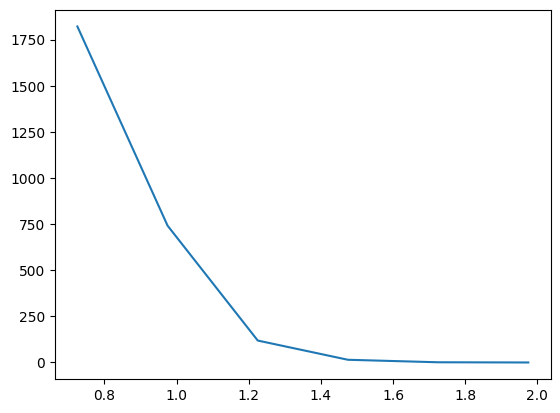

In [9]:
plt.plot(log10y_center,N_clusters_y_theory)

## class_sz FFT unbinned calculation

In [10]:

%%time
szcounts_param ={
'output': 'sz_cluster_counts_fft',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'Omega_b': 0.049,
'Omega_cdm':  0.261,
'H0': 68.,
'sigma8': 0.81,
'tau_reio':  0.0561,
'n_s': 0.965,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,  
    
'M_min': 5e13*0.6766,
'M_max': 1e16*0.6766,
'mass_epsrel':1e-4,
'mass_epsabs':1e-100,
'ndim_redshifts':185, 
    
'n_z_dndlnM' : 512,
'n_m_dndlnM' : 512,


    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,


'sz_selection_function_thetas_file' : f'{path_to_act_dr6_data}/nemo_sim_thetas_151024_49bins.txt',
'sz_selection_function_skyfracs_file' : f'{path_to_act_dr6_data}/nemo_sim_skyfracs_151024_49bins.txt',
'sz_selection_function_ylims_file' : f'{path_to_act_dr6_data}/nemo_sim_ylims_151024_49bins.txt',    

    
'A_ym'  : 2.2e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.2,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_skyaveraged_noise': 0, # this will speed-up everything
    
    
# 'N_samp_fftw' : 2**12,
'N_samp_fftw' : 4056,

'szcounts_fft_nz' : 550,

'z_min' : 0.0,
'z_max' : 2.02,
    
'szcounts_fft_z_min' : 0.01,
'szcounts_fft_z_max' : 2.01,
    
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':500.,
    
'sigma_derivative' : 0,
'szcc_dof': 3.,
'szcc_qtrunc':2.,

    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
    
'cosmo_model': 1,
        }
M.set(szcounts_param)
        
M.compute_class_szfast()
# M.compute()

CPU times: user 2min 40s, sys: 2.06 s, total: 2min 42s
Wall time: 21.8 s


In [11]:
M.sigma8()

0.8099999999999999

In [12]:
szcounts = M.szcounts_ntot_rates_loglike()
# print(szcounts['ntot'],szcounts['loglike'])
print(szcounts['ntot'])

2772.3464382767474


In [1]:
72/2700

0.02666666666666667

In [13]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 5.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
print(Ntot)

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

2772.1065775760017


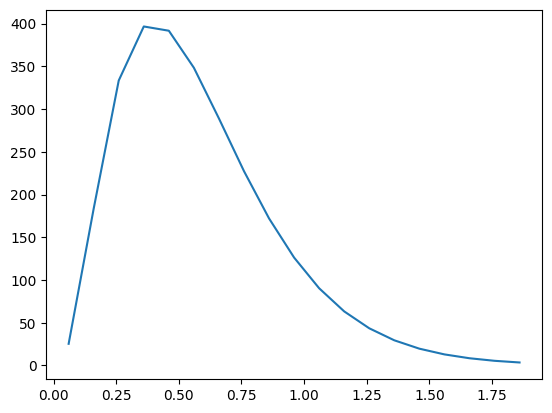

In [14]:
plt.plot(z_center,Nz_binned)

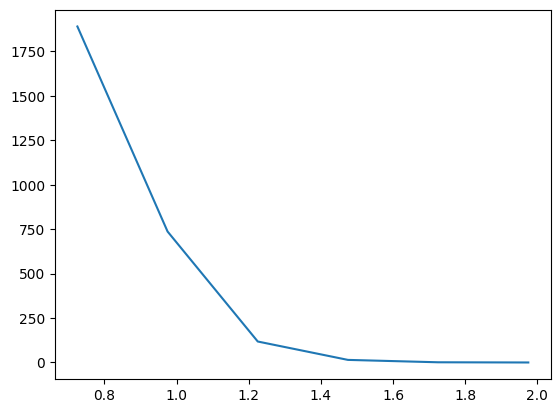

In [15]:
plt.plot(log10y_center,Nq_binned)

In [ ]:
%%time
import cosmocnc as cnc
import classy_sz
import numpy as np
number_counts = cnc.cluster_number_counts()
cnc_params = number_counts.cnc_params
#### set params here
cnc_params_new = {


    "n_points": 1024*32,#2**7, #number of points in which the mass function at each redshift (and all the convolutions) is evaluated
    "M_min": 1e13,
    "M_max": 1e16,


    "obs_select_min": 5.,
    "obs_select_max": 100.,

    "z_min": 0.01,
    "z_max": 2.01,
    "n_z": 2000,


    # "cluster_catalogue":"Planck_MMF3_cosmo",
    
    'observables': [["q_act"]],
    'obs_select': "q_act",
    'cluster_catalogue' : 'act',
    



    
    "number_cores_hmf": 1,
    "number_cores_abundance": 8,
    "number_cores_data": 16,

    "parallelise_type": "patch", # patch is important for this benchmark
    "scalrel_type_deriv": "numerical",

    "abundance_integral_type":"fft",
    "compute_abundance_matrix":True,
    # 'm_ncdm'

    "cosmo_amplitude_parameter": "sigma_8",
    'A0' : np.log10(2.2e-05),
    'B0 ': 0.08,
    'SZmPivot' : 4.25e14,
    'bias_sz' : 1.,
    'sigma_lnq' : 0.2,
    'C0' : 0.,

    'Ob0': 0.049,
    'Om0':  0.261+0.049,
    'H0': 68.,
    'sigma8': 0.81,
    'tau_reio':  0.0561,
    'n_s': 0.965,
    
    "m_nu":0.06,
    'tau_reio':  0.0561,
    "dof":3.,
    

    "mass_definition": "200c",
    "class_sz_use_m500c_in_ym_relation": 0,
    "class_sz_use_m200c_in_ym_relation": 1,
    "class_sz_output": "mPk,m500c_to_m200c,m200c_to_m500c",
    
    'apply_obs_cutoff' : True,
    
    'cosmology_tool' : "classy_sz",
    "cosmo_model" : "lcdm",
    "class_sz_ndim_redshifts" : 500,
    "class_sz_ndim_masses" : 100,  # when using cosmopower this is automatically fixed. 
    "class_sz_concentration_parameter" : "B13",
    "class_sz_hmf": "T08M200c", 
    "hmf_calc": "classy_sz",
    "interp_tinker": "log", #"linear" or "log"

    
}
for k,v in cnc_params_new.items():
    cnc_params[k] = v
number_counts.cnc_params = cnc_params
number_counts.initialise()

cosmo_params = number_counts.cosmo_params
scal_rel_params = number_counts.scal_rel_params
# print(cosmo_params)

# cosmo_params["H0"] = 68.
for k,v in cnc_params_new.items():
    cosmo_params[k] = v
    scal_rel_params[k] = v

number_counts.get_number_counts()
number_counts.get_abundance_matrix()


PATH_TO_COSMOPOWER_ORGANIZATION is already set to: /Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization
PATH_TO_CLASS_SZ_DATA not set.
Defaulting to: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is not correctly set. Setting it now...
PATH_TO_CLASS_SZ_DATA is set to /Users/boris/class_sz_data_directory
Required directories already exist. Skipping download.


In [ ]:
# log_lik_binned = number_counts.get_lik_binned()
dndz = number_counts.n_z
dndq = number_counts.n_obs
cnc_zs = number_counts.redshift_vec
cnc_qs = number_counts.obs_select_vec
# print("dndz:",dndz)
# print("dndq:",dndq)
# print("cnc_zs:",cnc_zs)
# print("cnc_qs:",cnc_qs)

In [ ]:
from scipy import interpolate
zmin = cnc_zs[0]
zmax = cnc_zs[-1]
nz = len(cnc_zs)
z_arr = cnc_zs

q_threshold = cnc_qs[0]
q_max = cnc_qs[-1]
nq = len(cnc_qs)
q_arr = cnc_qs
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
# get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
# Nz = []
# for zp in z_arr:
#     Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
# Nz = np.asarray(Nz)
# Nq = []
# for qp in q_arr:
#     Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
# Nq = np.asarray(Nq)
Ntot = np.trapz(dndz,x=z_arr)
# Ntot = np.sum(Nz)*dz
print(Ntot)

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned_cnc = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    # Nz_in = []
    # for zpbin in z_arr_bin:
    #     Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    dndz_inter = interpolate.interp1d(cnc_zs,dndz,bounds_error=False,fill_value=0.)
    # dndz_inter = np.interp(z_arr_bin,cnc_zs,dndz)
    Nz_binned_cnc.append(np.trapz(dndz_inter(z_arr_bin),x=z_arr_bin))
Nz_binned_cnc = np.asarray(Nz_binned_cnc)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned_cnc = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    # Nq_in = []
    # for qpbin in q_arr_bin:
    #     if 10.**qpbin<q_threshold:
    #         Nq_in.append(0.)
    #     else:
    #         Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    dndq_inter = interpolate.interp1d(cnc_qs,dndq,bounds_error=False,fill_value=0.)
    Nq_binned_cnc.append(np.trapz(dndq_inter(10**q_arr_bin),x=10**q_arr_bin))
Nq_binned_cnc = np.asarray(Nq_binned_cnc)